In [1]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
# Decision Tree
from sklearn import tree
X = cancer.data
y = cancer.target
clf = tree.DecisionTreeClassifier(random_state = 71)
clf.fit(X,y)
y_pred = clf.predict(X)
print("clf.score = ", clf.score(X, y))
print("accuracy score = ", accuracy_score(y_pred, y))

clf.score =  1.0
accuracy score =  1.0


>10, train: 1.000, test: 0.982
>20, train: 1.000, test: 0.939
>30, train: 1.000, test: 0.924
>40, train: 1.000, test: 0.930
>50, train: 1.000, test: 0.891
>60, train: 1.000, test: 0.877
>70, train: 1.000, test: 0.902
>80, train: 1.000, test: 0.910
>90, train: 1.000, test: 0.903


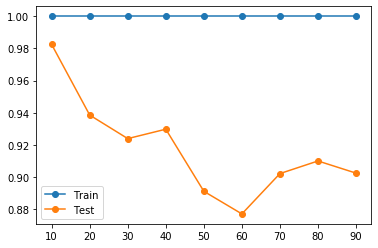

In [3]:
# Decision Tree (Split data randomly from 90~10%)
from sklearn import tree
X = cancer.data
y = cancer.target

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
train_scores = []
test_scores = []

for i in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i/100, random_state=71)

    clf = tree.DecisionTreeClassifier(random_state = 71)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train) #train
    train_acc = accuracy_score(y_pred_train, y_train)
    train_scores.append(train_acc)
    
    y_pred_test = clf.predict(X_test) #test
    test_acc = accuracy_score(y_pred_test, y_test)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(ratiovalues, train_scores, '-o', label='Train')
plt.plot(ratiovalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

>1, train: 0.920, test: 0.947
>2, train: 0.943, test: 0.930
>3, train: 0.980, test: 0.965
>4, train: 0.982, test: 0.965
>5, train: 0.994, test: 0.982
>6, train: 0.998, test: 0.982
>7, train: 1.000, test: 0.982
>8, train: 1.000, test: 0.982
>9, train: 1.000, test: 0.982
>10, train: 1.000, test: 0.982
>11, train: 1.000, test: 0.982
>12, train: 1.000, test: 0.982
>13, train: 1.000, test: 0.982
>14, train: 1.000, test: 0.982
>15, train: 1.000, test: 0.982
>16, train: 1.000, test: 0.982
>17, train: 1.000, test: 0.982
>18, train: 1.000, test: 0.982
>19, train: 1.000, test: 0.982
>20, train: 1.000, test: 0.982


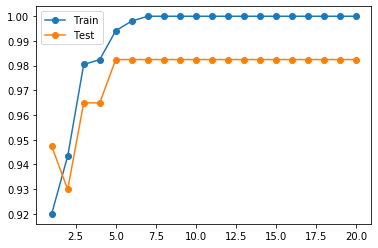

In [4]:
# Decision Tree (Split data randomly by 90% vs. 10% + different depth)
from sklearn import tree
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=71) #train_size = 0.8

depth = 21
depthvalues = [i for i in range(1, depth)]
train_scores = []
test_scores = []

for i in depthvalues:
    clf = tree.DecisionTreeClassifier(random_state = 71, max_depth = i)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train) #train
    train_acc = accuracy_score(y_pred_train, y_train)
    train_scores.append(train_acc)
    
    y_pred_test = clf.predict(X_test) #test
    test_acc = accuracy_score(y_pred_test, y_test)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(depthvalues, train_scores, '-o', label='Train')
plt.plot(depthvalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

>1, train: 1.000, test: 0.982
>2, train: 0.998, test: 0.947
>3, train: 0.982, test: 0.930
>4, train: 0.977, test: 0.930
>5, train: 0.977, test: 0.965
>6, train: 0.977, test: 0.947
>7, train: 0.975, test: 0.965
>8, train: 0.965, test: 0.930
>9, train: 0.965, test: 0.930


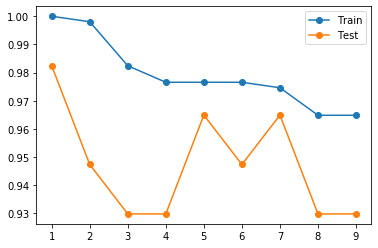

In [5]:
# Decision Tree (Split data randomly by 90% vs. 10% + different min sample leaf)
from sklearn import tree
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=71) #train_size = 0.8

leaf = 10
leafvalues = [i for i in range(1, leaf)]
train_scores = []
test_scores = []

for i in leafvalues:
    clf = tree.DecisionTreeClassifier(random_state = 71, min_samples_leaf = i)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train) #train
    train_acc = accuracy_score(y_pred_train, y_train)
    train_scores.append(train_acc)
    
    y_pred_test = clf.predict(X_test) #test
    test_acc = accuracy_score(y_pred_test, y_test)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(leafvalues, train_scores, '-o', label='Train')
plt.plot(leafvalues, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [6]:
# Decision Tree (Split data randomly by 90% vs. 10% + different depth + different min sample leaf)
from sklearn import tree
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=71) #train_size = 0.8

depth = 21
depthvalues = [i for i in range(1, depth)]
leaf = 10
leafvalues = [i for i in range(1, leaf)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_depth = 0
relative_best_leaf = 0

for i in depthvalues:
    for j in leafvalues:
        clf = tree.DecisionTreeClassifier(random_state = 71, max_depth = i, min_samples_leaf = j)
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train) #train
        train_acc = accuracy_score(y_pred_train, y_train)
        y_pred_test = clf.predict(X_test) #train
        test_acc = accuracy_score(y_pred_test, y_test)

        if ((train_acc > relative_best_train_score) and (test_acc > relative_best_test_score)):
            relative_best_train_score = train_acc
            relative_best_test_score = test_acc
            relative_best_depth = i
            relative_best_leaf = j

print("best depth:", relative_best_depth, "best min_sample_leaf:", relative_best_leaf, \
      "\nTraining score:", relative_best_train_score, "Testing score:", relative_best_test_score)

best depth: 5 best min_sample_leaf: 1 
Training score: 0.994140625 Testing score: 0.9824561403508771
